# KIYAFET BEDEN ANALİZİ

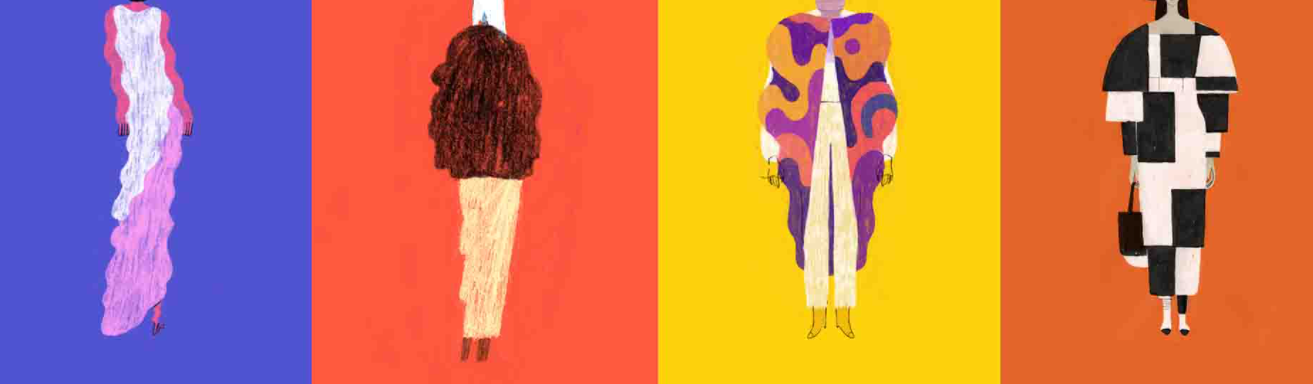

Amaç: Hangi beden kıyafetleri hangi boy ve kilodaki kişilerin aldığını öğrenmek, örneğin
s beden kıyafeti hangi boy ve kilodaki insanlar kullanabilir bunun sonucuna varmak.

Sorun: E-ticaret sitesi olduğundan kişi sadece kendine değil aynı üyelikle başka kişilere de kıyafet alabilir bu yüzden veri setinde aykırı değerler var, örneğin 113 kilo olan biri s beden kıyafet almış.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data=pd.read_csv("../input/clothessizeprediction/final_test.csv")

In [ ]:
data.head()

In [ ]:
#Başlangıçta beden/boy/kilo ortalamaları bu şekilde
data.groupby("size")[["weight","height"]].mean()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

Age sütunuyla çok bir işim yok o yüzden nan değerler kalabilir ama height'in boş değerlerine ortalama height değerini atayacağım.

In [ ]:
data["height"].fillna(data["height"].mean(),inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
data[data["age"]==0].head()

Yaşlar anormal değerde ama yaşlara ihtiyacım olmadığı için bu durumu es geçiyorum müşteri tekilleştirmesinde kullanacağımdan önemli bir bilgi ama.

In [ ]:
data[data["size"]=="S"].describe() 

Aykırı değerleri daha net görmek için üye bilgilerine göre 40 kilo ve daha altında olan kişilerin aldıkları beden ölçülerine bakıyorum s ve xxs hariç. Bunlar aykırı değer olmaz çünkü.

In [ ]:
data[(data["weight"]<40) & (data["size"]!="S") & (data["size"]!="XXS")]

Müşterileri tekilleştirmek istiyorum aynı yaş,kilo ve boydaki kişileri bir müşteri olarak kabul edeceğim

In [ ]:
data["age_weight_height"]=[str(i[1])+"_"+str(i[0])+"_"+str(i[2]) for i in data.values]
data.head()

##### age_weight_height sütununu oluşturmamın sebebi burdan müşteri id'si oluşturmaktı.
##### Burada verilen aynı yaş,boy,kiloda olan kişileri tekilleştiriyorum ve customer_id atıyorum.

In [ ]:
b=data["age_weight_height"].value_counts().index
b

In [ ]:
def customer_check(i,a,c):
    data.loc[data["age_weight_height"]==a,"customer_id"]=c

In [ ]:
c=0
for i in range(14149):
    if b[i] in data["age_weight_height"].values:
        c+=1
        customer_check(i,b[i],c)

In [ ]:
data["customer_id"]=[int(i) for i in data["customer_id"]]
data.head()

In [ ]:
data["age_weight_height"].nunique() #aynı nitelikte müşteriler var sayı 119734'ten 14149'a inmiş çünkü

### Tek beden (yalnızca s,yalnızca m..) alışveriş yapan kişilerin index numaralarına erişmek istiyorum.Eriştiğim index numaralarıyla yeni bir dataframe oluşturup analizine bakıyorum. (mesela yalnıca 10 tane s beden kıyafet alan bir müşteri) Düşüncem 10 tane aynı bedenden kıyafet alırsa muhtemelen kendine alışveriş yapıyordur(olasılık)

In [ ]:
index_list=[] 
inn=[index_list.append(i) for i in range(1,14150) if data.groupby("customer_id")["size"].value_counts()[i].count()==1]

In [ ]:
index_list[0:5]

In [ ]:
data_new=data.loc[index_list,:]

In [ ]:
data_new.describe().T

In [ ]:
data_new.head()

Müşterileri tekilleştirdiğim için aynı yaş boy ve kiloda olan insanlar olduğundan veride aynı customer id'ye sahip farklı kişiler bulunmakta

In [ ]:
valuee=data_new.groupby("customer_id")["size"].value_counts()
valuee.head()

In [ ]:
data_new.groupby(["size"])[["weight","height"]].mean()

In [ ]:
data.groupby(["size"])[["weight","height"]].mean()

Analiz öncesi ve sonrasında çok büyük bir fark yok,bir diğer ihtimal üzerinde duruyorum.

### Yalnızca tek parça alan kişilerin analizini yapalım. (Bu şekilde yapmamın sebebi bir kişi tek parça bir şey alıyorsa çok büyük ihtimalle kendine alıyordur diye düşünmem.Bu şekilde aldığı beden ölçüsüyle kendi boy ve kilosu arasındaki ilişkiyi daha rahat görebiliriz.)

In [ ]:
a=data.groupby("customer_id")[["size"]].count()

In [ ]:
a.loc[5,"size"]

In [ ]:
#burada sadece tek bir parça ürün alan kişinin feature sütununa 1, daha fazla alan kişininkine de 0 atıyorum.
for i in range(1,14150):
    if a.loc[i,"size"]==1:
        a.loc[i,"feature"]=1
    elif a.loc[i,"size"]>1:
        a.loc[i,"feature"]=0

In [ ]:
dnew=pd.merge(data,a, on="customer_id")
dnew.head()

In [ ]:
dnew["feature"]=dnew["feature"].astype(int)

In [ ]:
df=dnew[dnew["feature"]==1]

In [ ]:
df.describe()

In [ ]:
df["customer_id"].nunique()

In [ ]:
df.groupby("size_x")[["weight","height"]].mean()

In [ ]:
#Analiz öncesi ortalamalar
data.groupby("size")[["weight","height"]].mean()

Analiz sonrası ortalamalar gerçek beden-kilo tablosuna çok daha yakın.(aşağıdaki görsel)
Aykırı değerlerden kurtulunduğunda veri çok daha anlamlı sonuçlar veriyor.

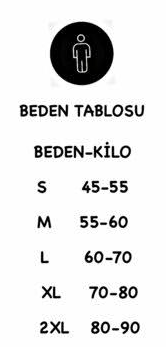